In [95]:
# Cecillia Cherish Mardjuki
# 825220090

In [96]:
from google.colab import drive
drive.mount('/content/drive')
# menghubungkan dengan drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# memberitahu alamat tempah meyimpan data di dalam Google drive
path1 = '/content/drive/MyDrive/yorkshire.csv'
path2 = '/content/drive/MyDrive/nutrition.csv'

In [98]:
import pandas as pd
dfY = pd.read_csv(path1)
dfNut = pd.read_csv(path2)

# memasukan dataset ke variable

In [99]:
from sklearn import linear_model
import matplotlib.pyplot as plt
# mengimport library yang akan digunakan

In [100]:
pip install -U scikit-learn

In [101]:
# ini hanya digunakan di vs code
# dfY = pd.read_csv("yorkshire.csv")
# # dfY.head()

# menampilkan 5 data teratas
dfY.head()

,id,age,gender,region,income,married,children,car,mortgage
0,ID12101,48,FEMALE,INNER_CITY,17546.000000,NO,1,NO,NO
1,ID12102,40,MALE,TOWN,30085.100000,YES,3,YES,YES
2,ID12103,51,FEMALE,INNER_CITY,16575.400000,YES,0,YES,NO
3,ID12104,23,FEMALE,TOWN,20375.400000,YES,3,NO,NO
4,ID12105,57,FEMALE,RURAL,15944.690366,YES,0,NO,NO


# TA2) Produce a scatter plot showing the age VS income

Text(0, 0.5, 'Income (£)')

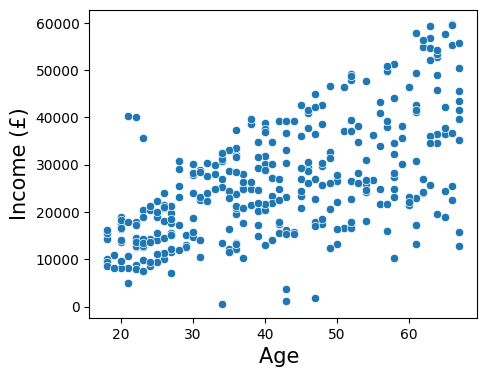

In [102]:
import seaborn as sns
#  import library yang dibutuhkan

plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
ax.set_xlabel('Age ',fontsize=15) # set x label
ax.set_ylabel('Income (£)',fontsize=15,rotation=90) # set y label
#  menampilakn diagram scatterplot yang menunjukan penghasilan orang pada umur tertentu

# TA3) Melatih model regresi linier untuk menentukan"garis kecocokan terbaik"

In [103]:
from sklearn import linear_model
# menginport library yang akan dibutuhkan

# membuat garis linear untuk digunakan pada diagram
regY = linear_model.LinearRegression()
# mengatur model dari garis linearnya
regY.fit(dfY["age"].to_numpy().reshape(-1,1), dfY["income"])


LinearRegression()

# TA4) Ekstrak dan laporkan koefisien (koefisienregresi dan intersep) dari model regresi linier terlatih

In [104]:
print("Regression coefficient beta = %.3f" % (regY.coef_))
print("Intercept coefficient alpha = %.3f" % (regY.intercept_))
# menampilkan koefisien dan intersep

 #α : intercept coefficient
 #β : regression coefficient

Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


<ipython-input-104-456f2e3fdf08>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regY.coef_))


# TA5) Hitung koefisien regresi dan intersep

In [105]:
 #Analytically: Checking the closed-form formulae
 #α : intercept coefficient
 #β : regression coefficient

import numpy as np
from scipy import stats
# import library

beta = stats.pearsonr(dfY["age"], dfY["income"])[0] * np.std(dfY["income"],ddof=1)/np.std(dfY["age"], ddof=1)
print("Regression coefficient beta = %.3f" % (beta))
alpha = np.mean(dfY["income"]) - beta * np.mean(dfY["age"])
print("Intercept coefficient alpha = %.3f" % (alpha))
# mengitung menggunakan rumus dan menampilkan hasil koefisien regresi dan intersep

Regression coefficient beta = 539.115
Intercept coefficient alpha = 3631.490


# TA6) prediksi tentang penghasilan Anda dalam waktu 10 tahun

In [106]:
age = 34
income = regY.predict([[age]])
print("Income when you become %d would be £%.2f" % (age, income))
y = alpha + beta * age
print("Income when you become %d would be £%.2f (analytically)" % (age, y))
print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))
# mencari prediksi penghasilan kita pada umur 34

Income when you become 34 would be £21961.40
Income when you become 34 would be £21961.40 (analytically)
Income = 3631.490 + 539.115 x Age


<ipython-input-106-0713d9184c9c>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income when you become %d would be £%.2f" % (age, income))
<ipython-input-106-0713d9184c9c>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Income = %.3f + %.3f x Age" % (regY.intercept_, regY.coef_))


# TA7) Plot model regresi linier di samping plot satter dari TA2

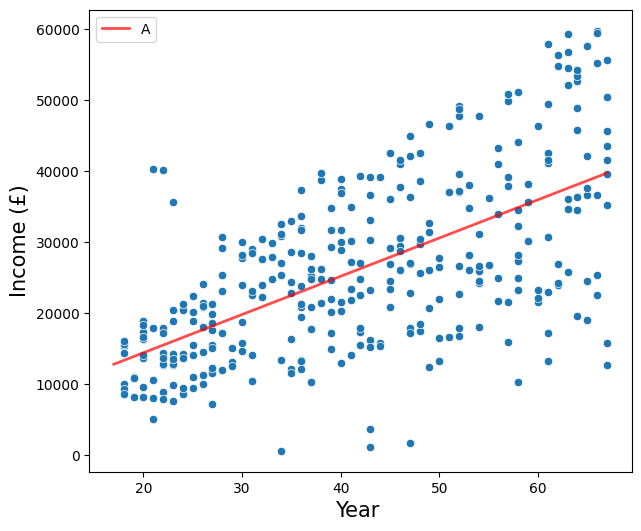

In [107]:
plt.subplots(figsize=(7,6), dpi=100)
ax = sns.scatterplot(x="age", y="income", data=dfY, marker='o')
ax.set_xlabel('Year ',fontsize=15) # set x label
ax.set_ylabel('Income (£)',fontsize=15,rotation=90) # set y label
min = dfY['age'].min()-1
max = dfY['age'].max()+1
model = regY.predict(np.arange(min,max).reshape(-1, 1))
ax = sns.lineplot(y=model, x=np.arange(min,max), linestyle='-', color="r", label="A", alpha=0.7, lw=2)
# menampilkan diagram scratterplot dan garis linear merah yang didapat dari scatterplot prediksipengdapata pada umur tertentu

In [108]:
dfNut.head()
# menampilkan 5 data teratas

,KnowledgeScore,CalciumIntake
0,10,450
1,42,1050
2,38,900
3,15,525
4,22,710


# TB3) Buat plot scatter yang memiliki variabel bebas pada sumbuX.

Text(0, 0.5, 'Calcium Intake')

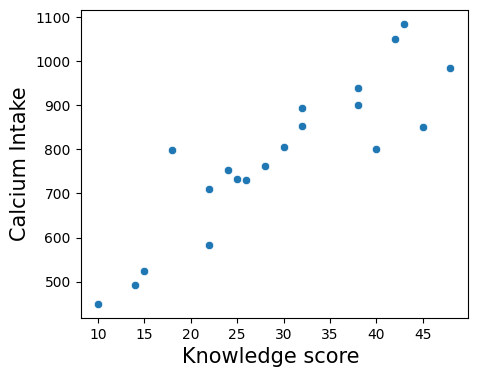

In [109]:
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake", data=dfNut, marker='o')
ax.set_xlabel('Knowledge score ',fontsize=15) # set x label
ax.set_ylabel('Calcium Intake',fontsize=15,rotation=90) # set y label
# menampilkan scatterplot yang memiliki variable bebas pada sumbu x atau knowlege score

# TB4) Hitung koefisien korelasi Pearson.

In [110]:
X = (dfNut["KnowledgeScore"]-np.mean(dfNut["KnowledgeScore"]))
Y = (dfNut["CalciumIntake"]-np.mean(dfNut["CalciumIntake"]))
r1 = np.sum(X*Y)/(dfNut.shape[0]-1)/np.std(dfNut["KnowledgeScore"], ddof=1)/np.std(dfNut["CalciumIntake"], ddof=1)
# menggunakan Scipy untuk menghitung koefisien korelasi Pearson
r2,_ = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])
# menggunakan Numpy untuk menghitung koefisien korelasi Pearson
r3 =np.corrcoef(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])
print("R1: %.3f" % (r1))
print("R2: %.3f" % (r2))
print("R3: %.3f" % (r3[0][1]))
# menghitung koefisien korelasi pearson

R1: 0.882
R2: 0.882
R3: 0.882


# TB6) Train a simple linear regression model to determine the "best line of fit" for this data

In [111]:
dfNutX = pd.DataFrame(dfNut['KnowledgeScore'])

dfNutY = dfNut.drop('KnowledgeScore', axis='columns')

regNut = linear_model.LinearRegression()
regNut.fit(dfNutX, dfNutY)

# melatih model regresi linear dimana knowledgescore digunakan sebagai variable independent untuk memprediaksi nilai nilai dari kolom lain-nya dalam dfNut

LinearRegression()

# TB7) Laporkan regresi dan koefisien intersep dari model regresi linier ini. Laporkan juga rumus akhir dari model regresi linier.

In [112]:
print("Regression coefficient beta = %.3f" % (regNut.coef_))
print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
print("CI = %.3f + %.3f x KS" % (regNut.intercept_, regNut.coef_))
# menampilkan koefisien dari regresi dan intersep

Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743
CI = 373.743 + 13.897 x KS


<ipython-input-112-faf81d4d1377>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Regression coefficient beta = %.3f" % (regNut.coef_))
<ipython-input-112-faf81d4d1377>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Intercept coefficient alpha = %.3f" % (regNut.intercept_))
<ipython-input-112-faf81d4d1377>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("CI = %.3f + %.3f x KS" % (regNut.intercept_, regNut.coef_))


# TB8) More about this source textSource text required for additional translation informationSend feedbackSide panelsHistorySavedContributeClear

In [113]:
beta  = stats.pearsonr(dfNut["KnowledgeScore"], dfNut["CalciumIntake"])[0] * np.std(dfNut["CalciumIntake"],ddof=1)/np.std(dfNut["KnowledgeScore"],ddof=1)
print("Regression coefficient beta = %.3f" % (beta))
alpha = np.mean(dfNut["CalciumIntake"]) - beta * np.mean(dfNut["KnowledgeScore"])
print("Intercept coefficient alpha = %.3f" % (alpha))
# # menampilkan koefisien dari regresi dan intersep

Regression coefficient beta = 13.897
Intercept coefficient alpha = 373.743


# Hitung nilai R2.

In [114]:
from sklearn.metrics import r2_score
predictNut = regNut.predict(dfNutX)
print('R2 (sklearn ):', r2_score(dfNut["CalciumIntake"], predictNut))

 #Analytically
ssT = [ ((dfNut["CalciumIntake"][i]-np.mean(dfNut["CalciumIntake"]))**2) for
       i in range(0, len(dfNut["CalciumIntake"]))]
ssR = [ ((dfNut["CalciumIntake"][i]-predictNut[i])**2)                   for
       i in range(0, len(dfNut["CalciumIntake"]))]
ssM = [ ((predictNut[i]-np.mean(dfNut["CalciumIntake"]))**2)             for
       i in range(0, len(dfNut["CalciumIntake"]))]

print ("R2 (method A):", np.sum(ssM)/np.sum(ssT))
print ("R2 (method B):", 1 - np.sum(ssR)/np.sum(ssT))
# menghitung nilai R2(sklearn, method A, method B) menggunakan rumus

R2 (sklearn ): 0.7783741285106188
R2 (method A): 0.7783741285106188
R2 (method B): 0.7783741285106188


# TB10) Plot model regresi linier di bersama plot scatter dari tugas TB3

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  # for stateless transformers.


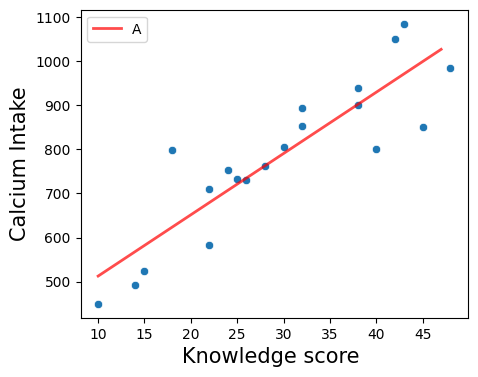

In [115]:
plt.subplots(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x="KnowledgeScore", y="CalciumIntake", data=dfNut, marker='o')
ax.set_xlabel('Knowledge score ',fontsize=15) # set x label
ax.set_ylabel('Calcium Intake',fontsize=15,rotation=90) # set y label
min = np.min(dfNut["KnowledgeScore"])
max = np.max(dfNut["KnowledgeScore"])
predictNut = regNut.predict(np.arange(min,max).reshape(-1,1))
ax = sns.lineplot(y=predictNut.flatten(), x=np.arange(min, max), linestyle='-',
color="r", label="A", alpha=0.7, lw=2)
# menampilkan scatterplot dan garis linier dari kalsium yang dimiliki dan nilai knowledge

# TB11) Hitung perkiraan asupan kalsium seorang siswa dengan pengetahuan skor kalsium sama dengan 30 (dari 50).

In [116]:
knowledgeScore = 30
calcium = regNut.predict([[knowledgeScore]])
print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, calcium))

CI = regNut.intercept_ +  regNut.coef_ * knowledgeScore
print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))
# menampilkan perhitungan perkiraan asupan kalsium dengan skor knowledge

Approximate calcium intake when knowledge score is 30 would be 790.66
Approximate calcium intake when knowledge score is 30 would be 790.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  # for stateless transformers.
<ipython-input-116-06fe92da60e0>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, calcium))
<ipython-input-116-06fe92da60e0>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Approximate calcium intake when knowledge score is %d would be %.2f" % (knowledgeScore, CI))
